In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64


In [4]:
path = untar_data(URLs.CIFAR); 

path

PosixPath('/root/.fastai/data/cifar10')

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/models'),
 PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/train'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt')]

In [0]:



np.random.seed(42)

data = ImageDataBunch.from_folder(path, train ='.', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)



In [7]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/models'),
 PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/train'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt')]

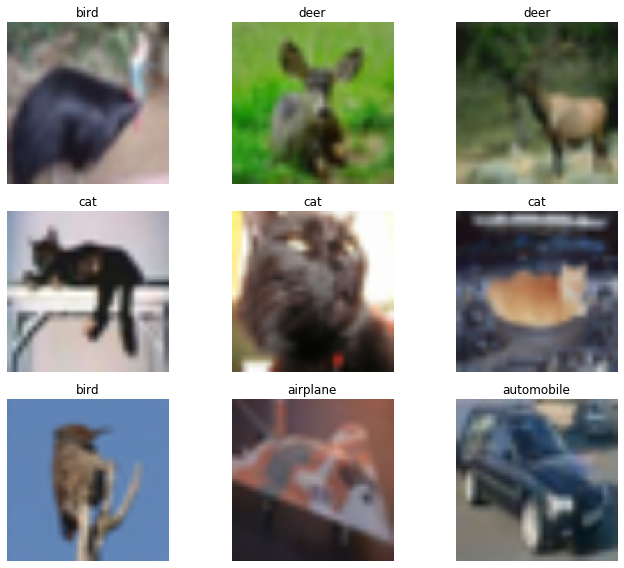

In [8]:
data.show_batch(rows=3, figsize=(10,8), ds_type=DatasetType.Valid)


In [9]:
print(data.classes)
len(data.classes),data.c

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(10, 10)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [11]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.546409,0.327377,0.110000,05:18
1,0.348606,0.211302,0.075500,05:17
2,0.264323,0.168932,0.059250,05:14
3,0.222297,0.159097,0.056250,05:13


In [0]:
learn.save('stage-1')

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

#data.valid_ds
losses


tensor([8.4785e+00, 8.2993e+00, 7.9044e+00,  ..., 1.1921e-07, 1.1921e-07,
        -0.0000e+00])

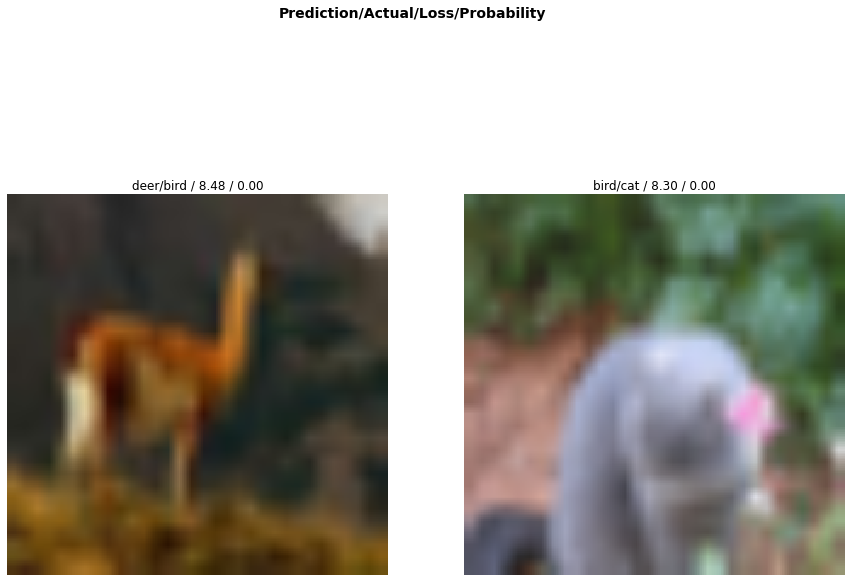

In [15]:
interp.plot_top_losses(2, figsize=(15,11))

In [16]:
doc(interp.plot_top_losses)

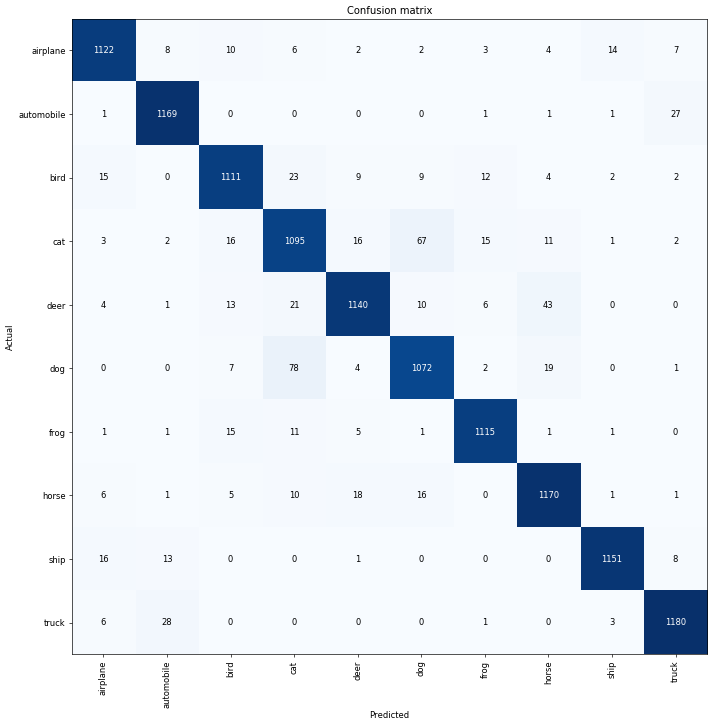

In [17]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [18]:
interp.most_confused(min_val=2)

[('dog', 'cat', 78),
 ('cat', 'dog', 67),
 ('deer', 'horse', 43),
 ('truck', 'automobile', 28),
 ('automobile', 'truck', 27),
 ('bird', 'cat', 23),
 ('deer', 'cat', 21),
 ('dog', 'horse', 19),
 ('horse', 'deer', 18),
 ('cat', 'bird', 16),
 ('cat', 'deer', 16),
 ('horse', 'dog', 16),
 ('ship', 'airplane', 16),
 ('bird', 'airplane', 15),
 ('cat', 'frog', 15),
 ('frog', 'bird', 15),
 ('airplane', 'ship', 14),
 ('deer', 'bird', 13),
 ('ship', 'automobile', 13),
 ('bird', 'frog', 12),
 ('cat', 'horse', 11),
 ('frog', 'cat', 11),
 ('airplane', 'bird', 10),
 ('deer', 'dog', 10),
 ('horse', 'cat', 10),
 ('bird', 'deer', 9),
 ('bird', 'dog', 9),
 ('airplane', 'automobile', 8),
 ('ship', 'truck', 8),
 ('airplane', 'truck', 7),
 ('dog', 'bird', 7),
 ('airplane', 'cat', 6),
 ('deer', 'frog', 6),
 ('horse', 'airplane', 6),
 ('truck', 'airplane', 6),
 ('frog', 'deer', 5),
 ('horse', 'bird', 5),
 ('airplane', 'horse', 4),
 ('bird', 'horse', 4),
 ('deer', 'airplane', 4),
 ('dog', 'deer', 4),
 ('airpla

In [0]:
learn.unfreeze()

In [20]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.209141,0.140891,0.047750,05:45


In [0]:
learn.load('stage-1');

In [22]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


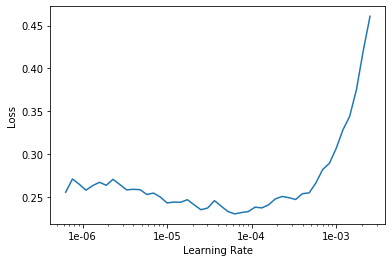

In [23]:
learn.recorder.plot()

In [24]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.208673,0.138623,0.047667,05:44
1,0.165686,0.129228,0.044167,05:44


##Resnet 50 training

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


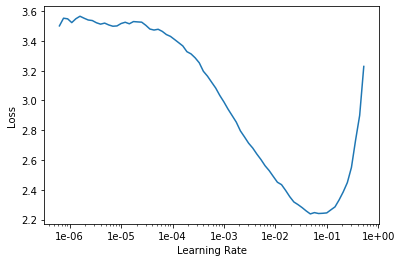

In [26]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.093696,0.112168,0.036917,08:24
1,0.115064,0.116863,0.038417,08:23
2,0.125580,0.118415,0.039000,08:23
3,0.109271,0.114535,0.038583,08:23


In [0]:
learn.save('stage-1-50')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

In [0]:
learn.load('stage-1-50');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)